In [1]:
import pandas as pd
import numpy as np
import pathlib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    StratifiedKFold,
    GridSearchCV,
)
from sklearn.utils import shuffle
from joblib import dump

from utils.MlPipelineUtils import get_features_data, get_dataset, get_X_y_data

import autosklearn.classification

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load training data from indexes and features dataframe
data_split_path = pathlib.Path("results/0.data_split_indexes.tsv")
features_dataframe_path = pathlib.Path("../1.format_data/data/training_data.csv.gz")

features_dataframe = get_features_data(features_dataframe_path)
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)

In [3]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
X, y = get_X_y_data(training_data)

print(X.shape)
print(y.shape)

(3338, 1280)
(3338,)


In [4]:
cls = autosklearn.classification.AutoSklearnClassifier(n_jobs=-1, memory_limit=5000, time_left_for_this_task=18000)
cls.fit(X, y)

[WARNING] [2022-07-27 16:56:23,609:Client-AutoML(1):4d2d0946-0dff-11ed-a0f6-d8bbc1a683bf] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17999.617142)
[WARNING] [2022-07-27 16:56:23,609:Client-AutoML(1):4d2d0946-0dff-11ed-a0f6-d8bbc1a683bf] Capping the per_run_time_limit to 8999.0 to have time for a least 2 models in each process.


/home/roshankern/anaconda3/envs/autosklearn/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/home/roshankern/anaconda3/envs/autosklearn/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


AutoSklearnClassifier(memory_limit=5000, n_jobs=-1, per_run_time_limit=43200,
                      time_left_for_this_task=18000)

In [5]:
test_data = get_dataset(features_dataframe, data_split_indexes, "test")
X_test, y_test = get_X_y_data(test_data)
print(X_test.shape)

(588, 1280)


In [6]:
y_pred = cls.predict(X_test)

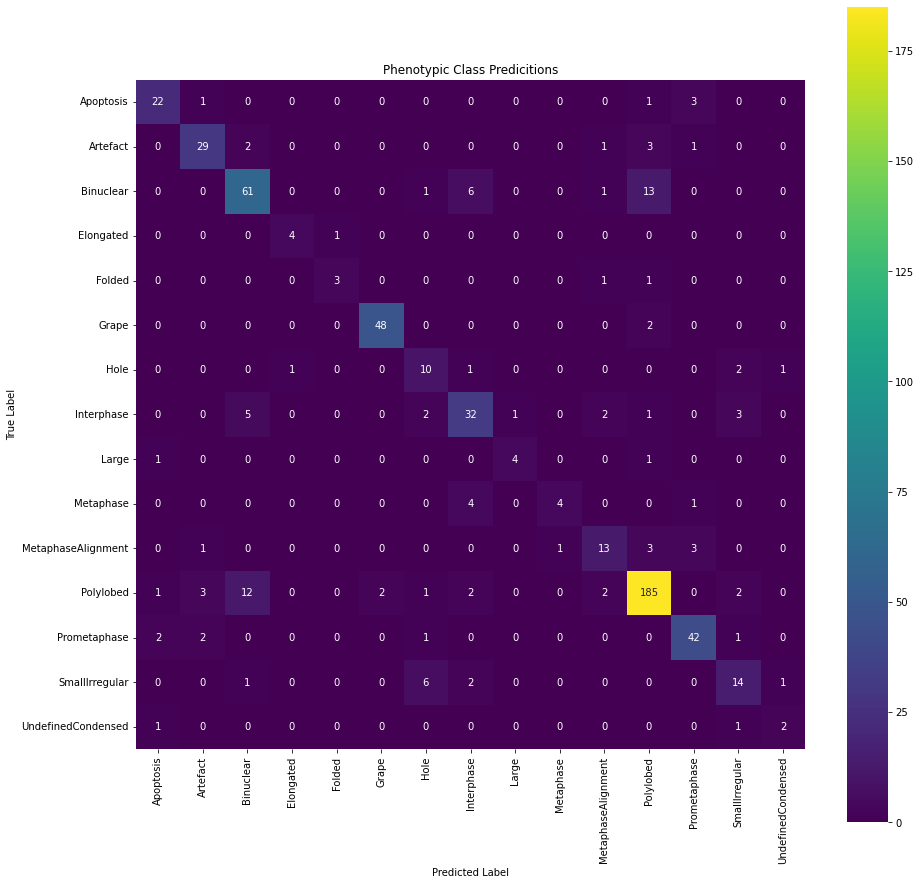

In [7]:
# create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=cls.classes_)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = cls.classes_
conf_mat.index = cls.classes_

# display confusion matrix
plt.figure(figsize=(15, 15))
ax = sns.heatmap(data=conf_mat, annot=True, fmt=".0f", cmap="viridis", square=True)
ax = plt.xlabel("Predicted Label")
ax = plt.ylabel("True Label")
ax = plt.title("Phenotypic Class Predicitions")

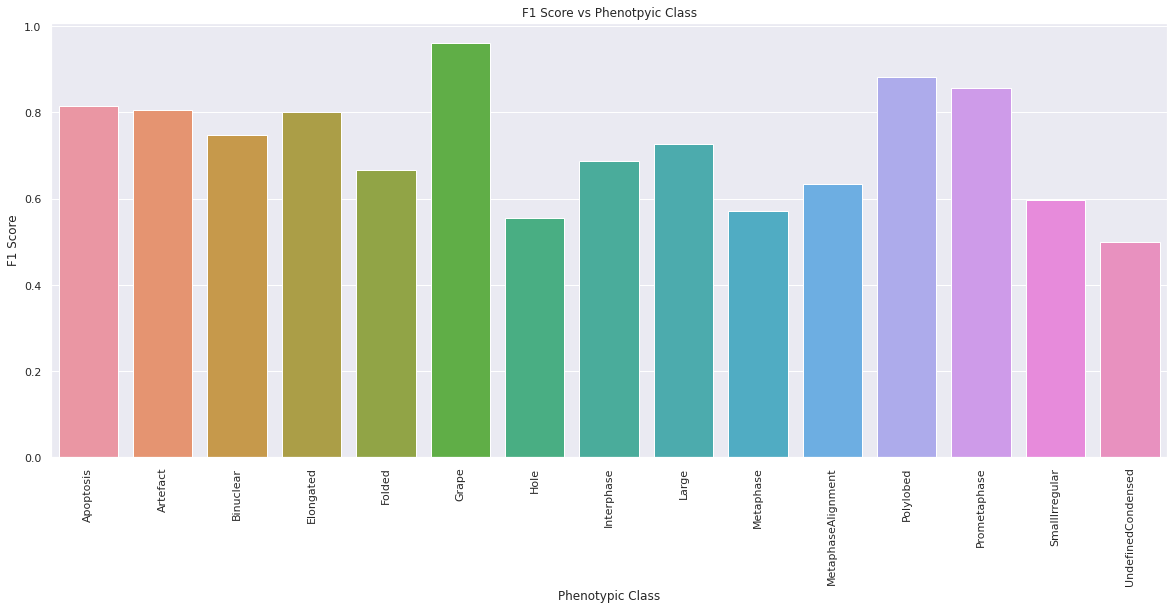

In [8]:
# display precision vs phenotypic class bar chart
scores = f1_score(
    y_test, y_pred, average=None, labels=cls.classes_, zero_division=0
)
scores = pd.DataFrame(scores).T
scores.columns = cls.classes_

sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=scores)